In [1]:
from sklearn.svm import OneClassSVM
import numpy as np

# Example: Generate random data (normal data)
X_train = np.random.randn(100, 2)  # 100 normal data points with 2 features

# Train One-Class SVM
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma="scale")
clf.fit(X_train)

# Example: New data for prediction
X_new = np.array([[1,1],[-1,-1],[-1.5,-2.5]])

# Predict anomalies (1 for normal, -1 for outlier)
predictions = clf.predict(X_new)

print(predictions)  # Output: [ 1 -1], where -1 is an outlier and 1 is normal


[ 1  1 -1]


In [2]:
X_train.shape

(100, 2)

In [3]:
X_train.min(axis=0)

array([-2.48119163, -2.74140174])

In [4]:
X_train.min()

-2.741401736903961

In [6]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming you have a dataset with missing values
X = np.array([[1, 2, np.nan], [3, np.nan, 1], [np.nan, 5, 6]])

# Initialize and fit the SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# X_imputed now contains the imputed dataset


In [7]:
X_imputed

array([[1. , 2. , 3.5],
       [3. , 3.5, 1. ],
       [2. , 5. , 6. ]])

In [8]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Sample dataset with missing values
X = np.array([[1, 2, np.nan], 
              [3, np.nan, 1], 
              [np.nan, 5, 6], 
              [8, 7, 9]])

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the dataset
X_imputed = imputer.fit_transform(X)

print("Original Data:\n", X)
print("Imputed Data:\n", X_imputed)


Original Data:
 [[ 1.  2. nan]
 [ 3. nan  1.]
 [nan  5.  6.]
 [ 8.  7.  9.]]
Imputed Data:
 [[ 1.          2.         -2.21065639]
 [ 3.          3.28204162  1.        ]
 [ 6.10579044  5.          6.        ]
 [ 8.          7.          9.        ]]


#### Customizing Estimators
##### In the example below:
- You can replace LinearRegression() with any other regression model (like DecisionTreeRegressor, BayesianRidge, etc.) based on your requirements.
- The IterativeImputer will use the specified model to predict missing values iteratively.
- Handling Convergence Issues
    - If you encounter convergence warnings (as seen in your search results), consider these strategies:
    - Increase max_iter: Allow more iterations for convergence.
    - Feature Scaling: Ensure that your features are appropriately scaled (e.g., using StandardScaler).
    - Regularization: If using models like Elastic Net within the imputer, consider adjusting regularization parameters.

- By specifying different regression models for imputing each feature, you can leverage the strengths of various algorithms to achieve better imputation results tailored to your data characteristics.
- Bayesian Ridge Regression is a probabilistic model that extends traditional linear regression by incorporating Bayesian principles. It provides a way to estimate the uncertainty of the model parameters, allowing for more robust predictions, especially in the presence of noise or overfitting.
- Bayesian Elastic Net Regression combines the principles of Bayesian inference with the Elastic Net regularization technique. This approach is particularly useful for handling datasets with multicollinearity and for situations where the number of predictors exceeds the number of observations.
    - Key Features of Bayesian Elastic Net Regression
    - Bayesian Framework: Unlike traditional regression methods that provide point estimates, Bayesian methods yield a distribution of possible values for each coefficient, allowing for uncertainty quantification.
    - Elastic Net Regularization: This method incorporates both L1 (Lasso) and L2 (Ridge) penalties, which helps in feature selection and reduces overfitting. The combination allows it to perform well in high-dimensional spaces.
    - Automatic Hyperparameter Tuning: Bayesian methods can automatically estimate hyperparameters related to the priors on coefficients, making it easier to find optimal settings without manual tuning.
    - Handling Convergence Issues: As indicated in your search results, convergence warnings may arise when fitting the model. This can often be addressed by increasing the number of iterations or adjusting feature scaling.

In [11]:
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNetCV

# Sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([1.5, 2.5, 3.5, 4.5])

# Initialize ElasticNet with cross-validation to find optimal alpha and l1_ratio
elastic_net = ElasticNetCV(cv=3)
elastic_net.fit(X, y)

# Use the coefficients from ElasticNet as priors in Bayesian Ridge
model = BayesianRidge()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

print("Predictions:", predictions)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Predictions: [1.5000002  2.50000007 3.49999993 4.4999998 ]
Coefficients: [0.49999993 0.49999993]
Intercept: 3.9999893441944323e-07


In [9]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor

# Sample dataset with missing values
X = np.array([[1, 2, np.nan], 
              [3, np.nan, 1], 
              [np.nan, 5, 6], 
              [8, 7, 9]])

# Define different estimators for each feature
estimators = {
    0: LinearRegression(),        # For the first feature
    1: DecisionTreeRegressor(),   # For the second feature
    2: BayesianRidge()            # For the third feature
}

# Initialize the IterativeImputer with a custom estimator for each feature
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)

# Fit and transform the dataset
X_imputed = imputer.fit_transform(X)

print("Original Data:\n", X)
print("Imputed Data:\n", X_imputed)


Original Data:
 [[ 1.  2. nan]
 [ 3. nan  1.]
 [nan  5.  6.]
 [ 8.  7.  9.]]
Imputed Data:
 [[1.         2.         5.33333333]
 [3.         4.66666667 1.        ]
 [4.77738516 5.         6.        ]
 [8.         7.         9.        ]]


In [12]:
from sklearn.preprocessing import KBinsDiscretizer

data = np.array([[1], [2], [6], [8], [10]])
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
discretized_data = discretizer.fit_transform(data)


In [13]:
discretized_data

array([[0.],
       [0.],
       [1.],
       [2.],
       [2.]])

In [14]:
import pandas as pd
import numpy as np

data = np.random.rand(10) * 100  # Sample continuous data
bins = [0, 25, 50, 75, 100]
discretized_data = pd.cut(data, bins=bins)


In [15]:
discretized_data

[(0, 25], (75, 100], (50, 75], (0, 25], (0, 25], (75, 100], (50, 75], (25, 50], (75, 100], (0, 25]]
Categories (4, interval[int64, right]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]

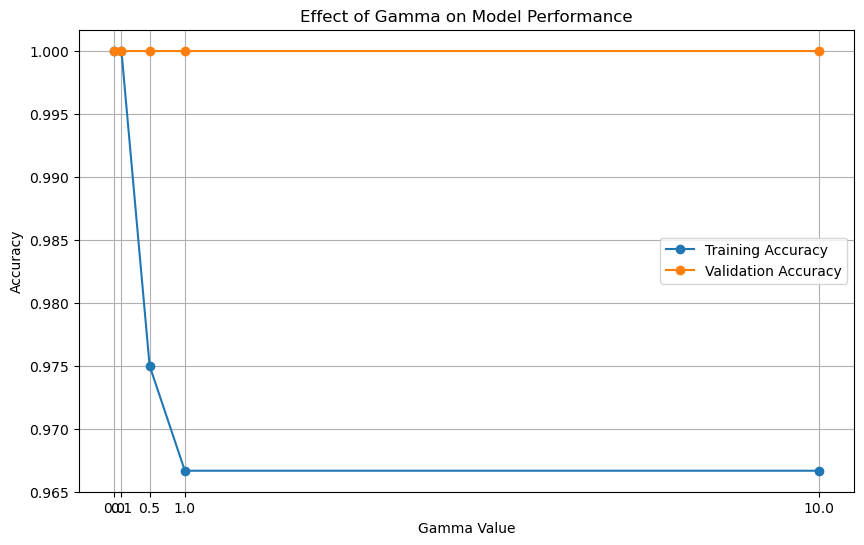

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of gamma values to test
gamma_values = [0, 0.1, 0.5, 1, 10]
train_accuracies = []
val_accuracies = []

# Train models with different gamma values and record accuracies
for gamma in gamma_values:
    model = XGBClassifier(gamma=gamma)
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_val, val_pred)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(gamma_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Effect of Gamma on Model Performance')
plt.xlabel('Gamma Value')
plt.ylabel('Accuracy')
plt.xticks(gamma_values)
plt.legend()
plt.grid()
plt.show()


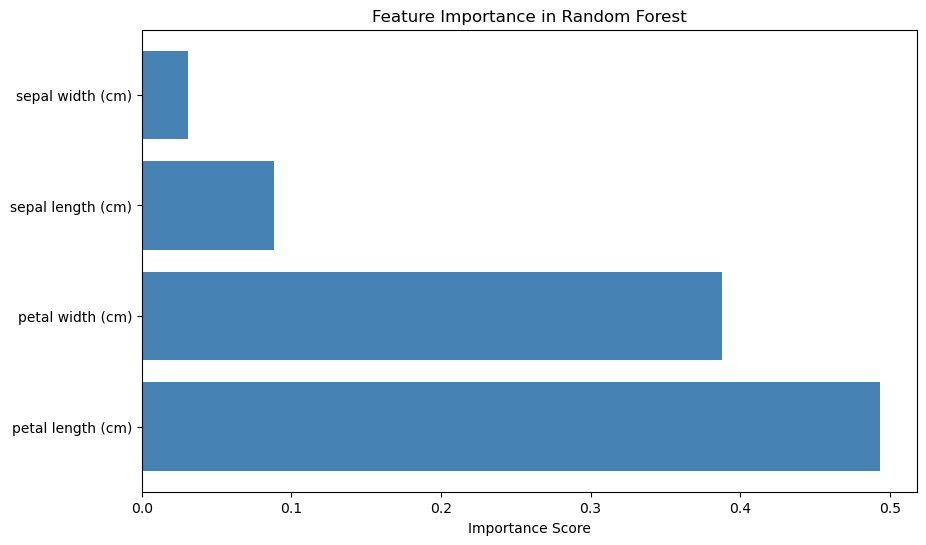

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset (Iris dataset as an example)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Random Forest')
plt.show()
